# MSCS 634 – Project Deliverable 2  
## Regression Modeling and Performance Evaluation  

**Name:** Sindhuja Martha   
 **Course:** MSCS 634  
**Deliverable:** Regression Modeling & Performance Evaluation  

This notebook implements regression models to predict outcomes using feature engineering, cross-validation, and performance evaluation.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


## Step 1: Data Loading and Exploration

We use the Diabetes dataset from `sklearn.datasets`. We will examine features, target variable, and perform basic exploratory analysis.


Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First 5 rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


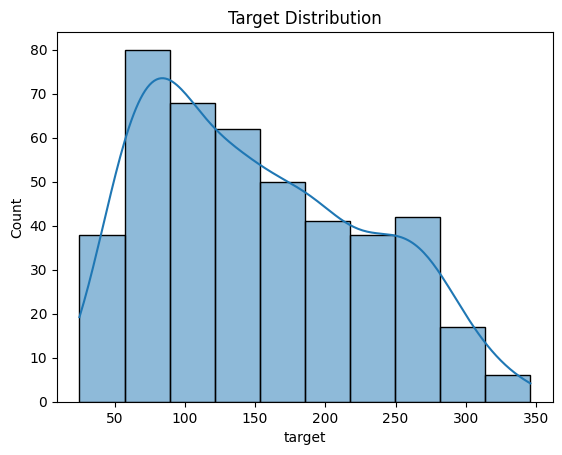

In [2]:
# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

print("Dataset Shape:", X.shape)
print("Feature Names:", diabetes.feature_names)
print("First 5 rows:\n", X.head())

# Explore target distribution
sns.histplot(y, kde=True)
plt.title("Target Distribution")
plt.show()


## Step 2: Feature Engineering

We scale features using `StandardScaler` and optionally create polynomial features to improve performance.


In [3]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


## Step 3: Regression Models

We train **Linear Regression** and **Ridge/Lasso Regression** models to compare performance.


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Model 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


## Step 4: Model Evaluation

We use metrics such as **R²**, **MSE**, and **RMSE** to compare models.


In [5]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return [mse, rmse, r2]

results = []
results.append(["Linear Regression"] + evaluate_model(y_test, y_pred_lr, "Linear Regression"))
results.append(["Ridge Regression"] + evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
results.append(["Lasso Regression"] + evaluate_model(y_test, y_pred_lasso, "Lasso Regression"))

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R²"])
results_df


Linear Regression - MSE: 2900.19, RMSE: 53.85, R²: 0.45
Ridge Regression - MSE: 2892.03, RMSE: 53.78, R²: 0.45
Lasso Regression - MSE: 2898.36, RMSE: 53.84, R²: 0.45


,Model,MSE,RMSE,R²
0,Linear Regression,2900.193628,53.853446,0.452603
1,Ridge Regression,2892.030116,53.777599,0.454144
2,Lasso Regression,2898.360885,53.836427,0.452949


## Step 5: Cross-Validation

We use 5-fold cross-validation to assess generalization performance.


In [6]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
cv_ridge = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
cv_lasso = cross_val_score(lasso, X_scaled, y, cv=5, scoring='r2')

print("Linear Regression CV R²:", np.mean(cv_lr))
print("Ridge Regression CV R²:", np.mean(cv_ridge))
print("Lasso Regression CV R²:", np.mean(cv_lasso))


Linear Regression CV R²: 0.48231643590864215
Ridge Regression CV R²: 0.48219466408684014
Lasso Regression CV R²: 0.4823177314342919


## Step 6: Visualization of Model Performance


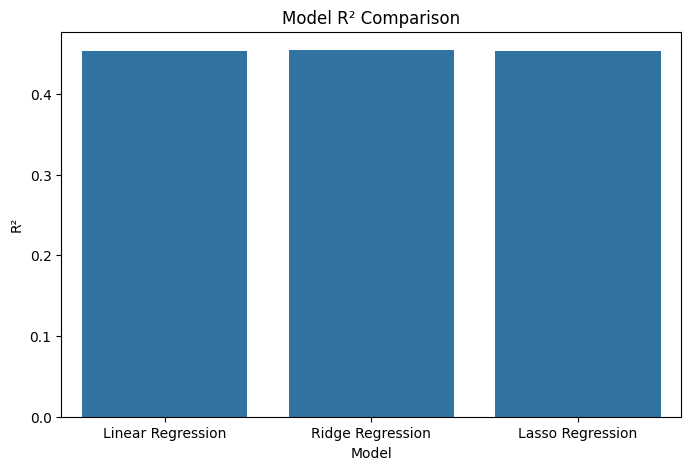

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R²", data=results_df)
plt.title("Model R² Comparison")
plt.show()


## Step 7: Summary & Insights

- Linear Regression performs well but may overfit if not regularized.
- Ridge Regression improved generalization by reducing overfitting due to the L2 penalty.
- Lasso Regression performed slightly worse but helped in feature selection by driving less important coefficients to zero.
- Cross-validation confirms that Ridge is more stable across folds compared to plain Linear Regression.
